In [1]:
import numpy as np
import pandas as pd

In [70]:
df = pd.read_csv('iris.csv')

In [71]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [9]:
df['Species'] = encoder.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df = df[df['Species'] != 0][['SepalWidthCm', 'PetalLengthCm', 'Species']]

In [13]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

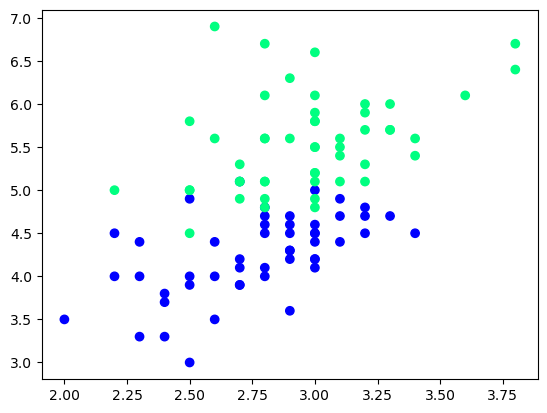

In [15]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c = df['Species'], cmap = 'winter')

In [17]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [18]:
df_train

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
70,3.2,4.8,1
116,3.0,5.5,2
98,2.5,3.0,1
122,2.8,6.7,2
52,3.1,4.9,1
120,3.2,5.7,2
105,3.0,6.6,2
133,2.8,5.1,2
147,3.0,5.2,2


In [20]:
df_val

,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
69,2.5,3.9,1
127,3.0,4.9,2
143,3.2,5.9,2
149,3.0,5.1,2


In [21]:
df_test

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
132,2.8,5.6,2
115,3.2,5.3,2
83,2.7,5.1,1
77,3.0,5.0,1


In [23]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:, -1].values

In [24]:
X_test

array([[2.8, 4. ],
       [2.5, 3.9],
       [3. , 4.9],
       [3.2, 5.9],
       [3. , 5.1]])

In [25]:
y_test

array([1, 1, 2, 2, 2])

# Case-1 Bagging

In [26]:
# data for tree 1
df_bag = df_train.sample(8, replace = True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
120,3.2,5.7,2
133,2.8,5.1,2
70,3.2,4.8,1
116,3.0,5.5,2
147,3.0,5.2,2
52,3.1,4.9,1
147,3.0,5.2,2
52,3.1,4.9,1


In [28]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 5.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.4 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.3 MB/s eta 0:00:00


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [32]:
dt_bag1 = DecisionTreeClassifier()

In [40]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

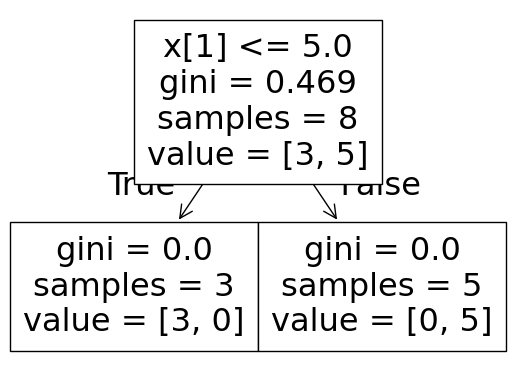

C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


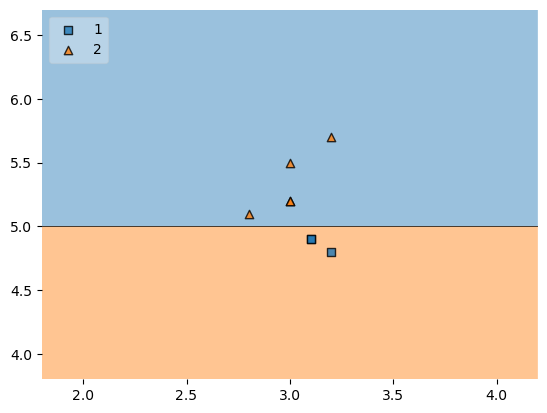

In [41]:
evaluate(dt_bag1, X, y)

In [79]:
# data for Tree 2
df_bag = df_train.sample(8, replace = True)

# Fetch X and y
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
70,3.2,4.8,1
116,3.0,5.5,2
70,3.2,4.8,1
105,3.0,6.6,2
98,2.5,3.0,1
147,3.0,5.2,2
133,2.8,5.1,2
133,2.8,5.1,2


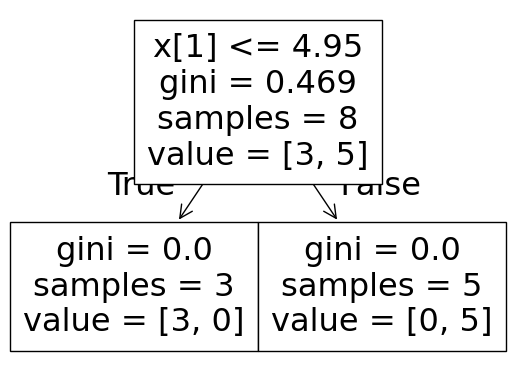

C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


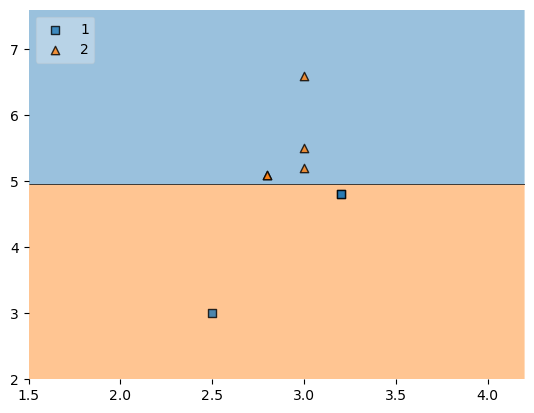

In [80]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [81]:
# data for Tree 3
df_bag = df_train.sample(8, replace = True)

# Fetch X and y
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

#print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
120,3.2,5.7,2
133,2.8,5.1,2
116,3.0,5.5,2
120,3.2,5.7,2
133,2.8,5.1,2
120,3.2,5.7,2
122,2.8,6.7,2
120,3.2,5.7,2


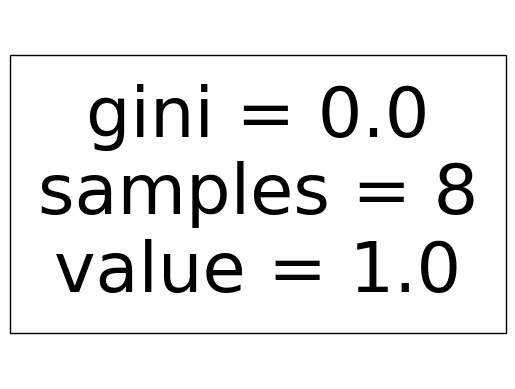

C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


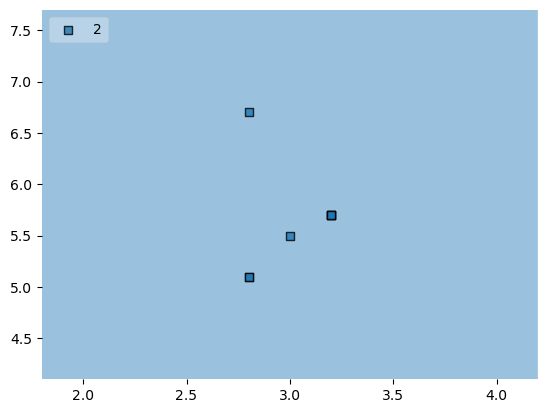

In [82]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

# predict

In [48]:
df_test

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
132,2.8,5.6,2
115,3.2,5.3,2
83,2.7,5.1,1
77,3.0,5.0,1


In [58]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [2]


C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\altam\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# pasting 
## but without replacement

In [59]:
df_train

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
70,3.2,4.8,1
116,3.0,5.5,2
98,2.5,3.0,1
122,2.8,6.7,2
52,3.1,4.9,1
120,3.2,5.7,2
105,3.0,6.6,2
133,2.8,5.1,2
147,3.0,5.2,2


In [60]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
105,3.0,6.6,2
70,3.2,4.8,1
133,2.8,5.1,2
52,3.1,4.9,1
146,2.5,5.0,2
147,3.0,5.2,2
98,2.5,3.0,1
122,2.8,6.7,2


# Random Subspaces
## but we can't use row sampling we do column sampling with replacement or w/o replacement, it doesn't matter

In [67]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [69]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
115,116,6.4,3.2,5.3,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [74]:
df1.sample(2, replace = True, axis = 1)

,SepalLengthCm,Id
86,6.7,87
13,4.3,14
92,5.8,93
101,5.8,102
83,6.0,84
67,5.8,68
142,5.8,143
40,5.0,41
115,6.4,116
149,5.9,150


# random patches

In [75]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
142,143,5.8,2.7,5.1,1.9,Iris-virginica
40,41,5.0,3.5,1.3,0.3,Iris-setosa
115,116,6.4,3.2,5.3,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [78]:
df1.sample(8, replace = True).sample(2, replace = True, axis = 1)

,SepalWidthCm,SepalLengthCm
92,2.6,5.8
86,3.1,6.7
67,2.7,5.8
13,3.0,4.3
101,2.7,5.8
83,2.7,6.0
92,2.6,5.8
13,3.0,4.3
